In [283]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt 
import math

warnings.filterwarnings("ignore")
os.chdir('U:\workarea\Equity Screening')
ddb = pd.read_excel('ESG Analysis.xlsx')
ddb.rename(columns = lambda x: x.lower().replace(' ','_').replace('\'','_'), inplace = True) 

print('-- QUICK STATS ACROSS ALL 8 PORTFOLIOS -- ')
print('Present in ddb: {}'.format(', '.join(ddb.portfolio_name.unique())))
nans = pd.DataFrame(data = ddb.isnull().sum(), columns = {'missing'})
nans = nans.transpose()
des = pd.DataFrame.append(nans, ddb.describe()).fillna(' - ')
scores0 = ['e0', 'g0', 's0', 'esg0']
print('Notes: 349 missing ESG Global Rating out of', ddb.cusip.count(), 'hence {0:.2f} %'.format(349*100/ddb.cusip.count()))
print('Missing issuers sec types:', ' '.join(ddb[ddb.issuer_name.isnull() == True]['region'].unique()), ' - Will be dropped / past weight added up to {0:.2f} %'\
     .format(ddb[ddb.region == 'FX']['market_value_%'].sum()))
print('Note: different number of NaNs in e0, g0, s0 - and esg0. Fewer missing deciles than missing esg = we assume that BNPP exclusions have been assigned decile 10')
des

-- QUICK STATS ACROSS ALL 8 PORTFOLIOS -- 
Present in ddb: MSEMSRIG, MSCIEMIEU, EKLD400, BNP0513, MSEURSR5, MSCIEURNT, MSJPSR5, MSJPNEXCON
Notes: 349 missing ESG Global Rating out of 3116 hence 11.20 %
Missing issuers sec types: FX  - Will be dropped / past weight added up to 0.02 %
Note: different number of NaNs in e0, g0, s0 - and esg0. Fewer missing deciles than missing esg = we assume that BNPP exclusions have been assigned decile 10


,country,cusip,decile0,e0,esg0,g0,gics,issuer_id,issuer_name,market_value_%,mkt_cap,parent_issuer_id,parent_issuer_name,portfolio_name,region,s0,security_description
missing,2,0,331.000000,402.000000,349.000000,404.000000,2,2,2,0.000000,0,2,2,0,0,404.000000,0
count,-,-,2785.000000,2714.000000,2767.000000,2712.000000,-,-,-,3116.000000,-,-,-,-,-,2712.000000,-
mean,-,-,5.220826,48.867740,55.613829,63.668179,-,-,-,0.002567,-,-,-,-,-,54.760734,-
std,-,-,3.004857,20.568542,12.709199,10.157431,-,-,-,0.025642,-,-,-,-,-,16.302325,-
min,-,-,1.000000,0.000000,0.000000,0.000000,-,-,-,-0.969982,-,-,-,-,-,0.000000,-
25%,-,-,3.000000,32.639250,46.585500,57.000000,-,-,-,0.000341,-,-,-,-,-,43.487500,-
50%,-,-,5.000000,50.000000,55.225000,63.442500,-,-,-,0.000809,-,-,-,-,-,54.500000,-
75%,-,-,8.000000,64.474000,64.997500,70.103500,-,-,-,0.002200,-,-,-,-,-,67.111000,-
max,-,-,10.000000,100.000000,94.353000,95.267000,-,-,-,0.989858,-,-,-,-,-,94.049000,-


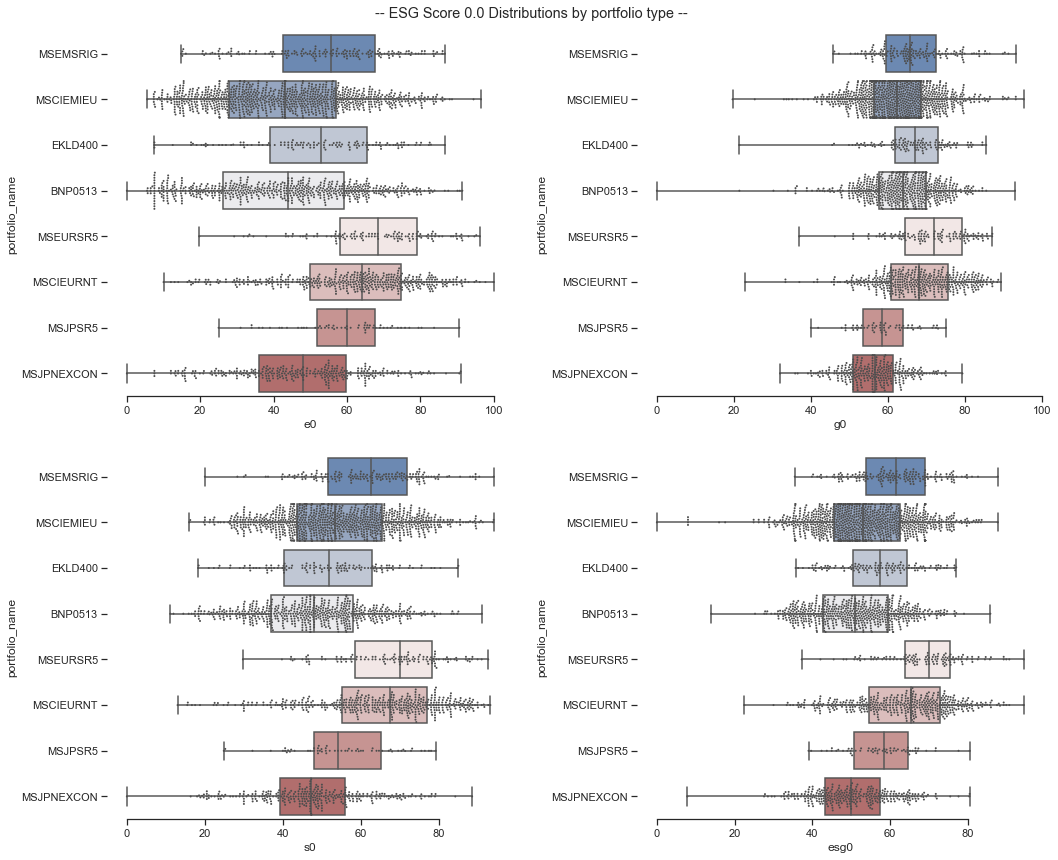

In [121]:
### PLOTTING PREVIOUS DISTRIBUTIONS AT PORTFOLIO LEVELS 
def plot_distrib(ddb, scores0): 
    fig = plt.figure(figsize = (15,12))
    i = 1
    for _ in scores0: 
        plt.subplot(2,2,i)
        sns.set(style = 'ticks')
        sns.boxplot(x = _, y = 'portfolio_name', data = ddb, whis = 'range', palette = 'vlag')
        sns.swarmplot(x = _, y = 'portfolio_name', data = ddb, size = 2, color = '.3', linewidth = 0)
        #plt.xaxis.grid(True)
        #ax.set(ylabel="")
        sns.despine(trim=True, left=True)
        i +=1
    
    plt.tight_layout(pad=1.5)
    plt.suptitle(' -- ESG Score ' + scores0[0][-1]+'.0 Distributions by portfolio type --', y=1)
    plt.show()
    
plot_distrib(ddb,scores0)

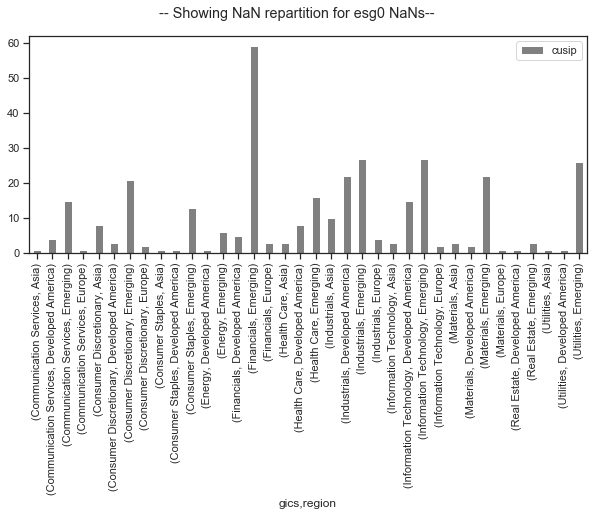

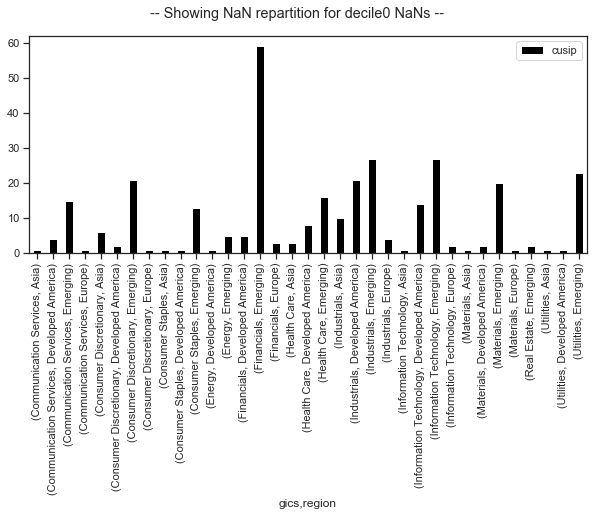

No significant inconsistencies between missing esg0 and decile0. Reminder:  323 values had no decile / Should be 0
NaN repartitions across the 4 ratings has been checked and no significant changes except Utilities Emerging/Financials Emerging.
Baseless ESG DataFrame Shape (baseless = either E/S/G missing) :  (166, 17)
Baseless ESG present in indices:  ['MSEMSRIG' 'MSCIEMIEU' 'BNP0513' 'EKLD400']
-- Extract -- 



,portfolio_name,security_description,mkt_cap,cusip,market_value_%,esg0,decile0,e0,s0,g0,issuer_id,issuer_name,parent_issuer_id,parent_issuer_name,country,gics,region
57,MSEMSRIG,CHINA LONGYUAN POWER GROUP CORP LT,> 10B,SB4Q2TX38,0.001399,69.0,4.0,NaN,NaN,NaN,R62841,CHINA LONGYUAN POWER GROUP CORP,R62167,CHINA PEOPLES REPUBLIC OF (GOVERNMENT),China,Utilities,Emerging
76,MSEMSRIG,HUANENG RENEWABLES CORPORATION COR,> 10B,SB4WTBY34,0.001506,69.0,4.0,NaN,NaN,NaN,F33470,HUANENG RENEWABLES CORP LTD,R62167,CHINA PEOPLES REPUBLIC OF (GOVERNMENT),China,Utilities,Emerging
202,MSCIEMIEU,YPF SOCIEDAD ANONIMA ADR EACH REPR,4B to 10B,984245100,0.000297,55.0,7.0,NaN,NaN,NaN,R57273,YPF SA,R49102,ARGENTINA REPUBLIC OF GOVERNMENT,Argentina,Energy,Emerging
226,MSCIEMIEU,CENTRAIS ELETR BRAS-ELETROBRAS,> 10B,S23111206,0.000364,75.0,10.0,NaN,NaN,NaN,R57428,CENTRAIS ELETRICAS BRASILEIRAS SA,R61159,BRAZIL FEDERATIVE REPUBLIC OF (GOVERNMENT),Brazil,Utilities,Emerging
250,MSCIEMIEU,CENTRAIS ELETR BRAS-ELETROBRAS SER,> 10B,S23084452,0.000410,75.0,10.0,NaN,NaN,NaN,R57428,CENTRAIS ELETRICAS BRASILEIRAS SA,R61159,BRAZIL FEDERATIVE REPUBLIC OF (GOVERNMENT),Brazil,Utilities,Emerging
294,MSCIEMIEU,LIAONING CHENG DA LTD A,> 10B,SBP3R5Z21,0.000024,69.0,4.0,NaN,NaN,NaN,D30528,LIAONING CHENG DA CO LTD,F34442,PEOPLES GOVERNMENT OF LIAONING PROVINCE,China,Consumer Discretionary,Emerging
305,MSCIEMIEU,POSTAL SAVINGS BANK OF CHINA LTD H,> 10B,BRT4YUXC5,0.000919,69.0,4.0,NaN,NaN,NaN,D34053,POSTAL SAVINGS BANK OF CHINA CO LTD,R62167,CHINA PEOPLES REPUBLIC OF (GOVERNMENT),China,Financials,Emerging
317,MSCIEMIEU,CHINA RESOURCES POWER LTD,> 10B,B0A0GZYU0,0.000433,69.0,4.0,NaN,NaN,NaN,B99012,CHINA RESOURCES POWER HOLDINGS CO LTD,R62167,CHINA PEOPLES REPUBLIC OF (GOVERNMENT),Hong Kong,Utilities,Emerging
340,MSCIEMIEU,HUADIAN POWER INTERNATIONAL CORP L,> 10B,S61427803,0.000113,69.0,4.0,NaN,NaN,NaN,D00833,HUADIAN POWER INTERNATIONAL CORP LTD,R62167,CHINA PEOPLES REPUBLIC OF (GOVERNMENT),China,Utilities,Emerging
359,MSCIEMIEU,GD POWER DEVELOPMENT LTD A,> 10B,SBP3R3J24,0.000054,69.0,4.0,NaN,NaN,NaN,C13598,GD POWER DEVELOPMENT CO LTD,R62167,CHINA PEOPLES REPUBLIC OF (GOVERNMENT),China,Utilities,Emerging


In [122]:
### PLOTTING NANS AGAINST GICS/REGIONS 
# We want: classification by reg/sec - flagging from sector^reg
ddb = ddb[ddb.region != 'FX'][ddb.gics != 'CASH'].copy() #Removing 2 lines FX and Cash (has US flag but no gics)
ddb[ddb['esg0'].isnull() == True].groupby(['gics', 'region']).agg({'cusip':'count',
                                                                 'esg0': 'mean'}).plot.bar(y = 'cusip', figsize = (10,4), colors = 'grey')
plt.suptitle('-- Showing NaN repartition for esg0 NaNs-- ')
fig = plt.figure(figsize = (10,5))  
plt.close()

# No Decile Repartition 
ddb[ddb['decile0'].isnull() == True].groupby(['gics', 'region']).agg({'cusip':'count'}).plot.bar(y ='cusip', figsize = (10,4), colors = 'black')
plt.suptitle('-- Showing NaN repartition for decile0 NaNs -- ')
plt.show()

print('No significant inconsistencies between missing esg0 and decile0. Reminder: ', ddb[ddb.decile0.isnull() == True].cusip.count(), 'values had no decile / Should be 0')
print('NaN repartitions across the 4 ratings has been checked and no significant changes except Utilities Emerging/Financials Emerging.')

#Counting E or S or G absent but final rating <> 0 
c1 = ddb[ddb.esg0.isnull() == False][ddb.e0.isnull() == True]
c2 = ddb[ddb.esg0.isnull() == False][ddb.g0.isnull() == True]
c3 = ddb[ddb.esg0.isnull() == False][ddb.s0.isnull() == True]
cc = pd.concat([c1,c2,c3])
cc.drop_duplicates()

print('Baseless ESG DataFrame Shape (baseless = either E/S/G missing) : ', cc.shape)
print('Baseless ESG present in indices: ',  cc.portfolio_name.unique())
print('-- Extract -- \n')
cc.head(10)

In [123]:
to_vstack = []
to_vstack2 = []
for i, row in ddb.iterrows(): 
    to_vstack.append(ddb.groupby(['gics', 'region']).agg({'esg0': 'mean'}).loc[row.gics, row.region][0])
    to_vstack2.append(ddb.groupby(['gics', 'region']).agg({'esg0': 'std'}).loc[row.gics, row.region][0])
    
vstack = pd.DataFrame(data = np.array(to_vstack), columns = {'gs_mean'})
vstack2 = pd.DataFrame(data = np.array(to_vstack2), columns = {'gs_std'})
ddb= ddb.join(vstack)
ddb = ddb.join(vstack2)

ddb.at[3108, 'gs_mean'] = 52.700148
ddb.at[3109, 'gs_mean'] = 50.407083
ddb.at[3110, 'gs_mean'] = 57.735909
ddb.at[3111, 'gs_mean'] = 57.735909
ddb.at[3112, 'gs_mean'] = 46.511171
ddb.at[3113, 'gs_mean'] = 52.700148
ddb.at[3114, 'gs_mean'] = 52.700148
ddb.at[3115, 'gs_mean'] = 50.407083

ddb.at[3108, 'gs_std'] = 10.100008
ddb.at[3109, 'gs_std'] = 8.471453
ddb.at[3110, 'gs_std'] = 7.631664
ddb.at[3111, 'gs_std'] = 7.631664
ddb.at[3112, 'gs_std'] = 11.824778
ddb.at[3113, 'gs_std'] = 10.100008
ddb.at[3114, 'gs_std'] = 8.385742
ddb.at[3115, 'gs_std'] = 8.471453

In [124]:
# Hypothesis: since most simply don't have an ESG breakdown, QRG replaced them with the sector/region split mean 
#Showing esg0 values >= 2 stdev away from their subgroup mean 
c1 = ddb[ddb.esg0.isnull() == False][ddb.e0.isnull() == True]
c2 = ddb[ddb.esg0.isnull() == False][ddb.g0.isnull() == True]
c3 = ddb[ddb.esg0.isnull() == False][ddb.s0.isnull() == True]
cc = pd.concat([c1,c2,c3])
cc.drop_duplicates()
more = cc[cc.esg0 >= cc.gs_mean + 2*cc.gs_std]
less = cc[cc.esg0<= cc.gs_mean -2*cc.gs_std]

print('Among the 166 lines with baseless ESG ratings, nb of lines with global ESG scores >= +/- 2stdev diff from subgroup mean: ',cc[cc.esg0<= cc.gs_mean -2*cc.gs_std].cusip.count())
print('From sectors:', ', '.join(cc.gics.unique()))
print('From countries:', ', '.join(cc.country.unique()))
print('\n -- Extract -- ')
less.head(10)

Among the 166 lines with baseless ESG ratings, nb of lines with global ESG scores >= +/- 2stdev diff from subgroup mean:  18
From sectors: Utilities, Energy, Consumer Discretionary, Financials, Industrials, Information Technology, Communication Services, Materials
From countries: China, Argentina, Brazil, Hong Kong, Colombia, Indonesia, India, Malaysia, Qatar, Saudi Arabia, United Kingdom, Ireland

 -- Extract -- 


,portfolio_name,security_description,mkt_cap,cusip,market_value_%,esg0,decile0,e0,s0,g0,issuer_id,issuer_name,parent_issuer_id,parent_issuer_name,country,gics,region,gs_mean,gs_std
389,MSCIEMIEU,CHINA RAILWAY SIGNAL COMMUNICATION,> 10B,SBYVDW437,0.000161,0.0,10.0,NaN,NaN,NaN,G72254,CHINA RAILWAY SIGNAL & COMMUNICATION CORP LTD,R62167,CHINA PEOPLES REPUBLIC OF (GOVERNMENT),China,Information Technology,Emerging,57.434618,14.710028
1183,MSCIEMIEU,SAUDI TELECOM,> 10B,SB12M7Q53,0.001955,8.0,10.0,NaN,NaN,NaN,C17140,SAUDI TELECOM CO,R84549,SAUDI ARABIA (KINGDOM OF),Saudi Arabia,Communication Services,Emerging,52.861162,10.701520
1188,MSCIEMIEU,SAUDI BASIC INDUSTRIES,> 10B,SB1324D05,0.003270,8.0,10.0,NaN,NaN,NaN,C88011,SAUDI BASIC INDUSTRIES CORP,R84549,SAUDI ARABIA (KINGDOM OF),Saudi Arabia,Materials,Emerging,52.861162,10.701520
1190,MSCIEMIEU,SAUDI ELECTRICITY,> 10B,SB132NM29,0.000817,8.0,10.0,NaN,NaN,NaN,D22790,SAUDI ELECTRICITY CO,R84549,SAUDI ARABIA (KINGDOM OF),Saudi Arabia,Utilities,Emerging,52.861162,10.701520
1192,MSCIEMIEU,YANBU NATIONAL PETROCHEMICALS,> 10B,SB128CF76,0.000561,8.0,10.0,NaN,NaN,NaN,D45825,YANBU NATIONAL PETROCHEMICALS CO,R84549,SAUDI ARABIA (KINGDOM OF),Saudi Arabia,Materials,Emerging,58.393534,12.523537
1194,MSCIEMIEU,NATIONAL COMMERCIAL BANK,> 10B,SBSHYYN11,0.002523,16.0,10.0,NaN,NaN,NaN,G88014,NATIONAL COMMERCIAL BANK SJSC,G88014,NATIONAL COMMERCIAL BANK SJSC,Saudi Arabia,Financials,Emerging,45.131109,10.319875
389,MSCIEMIEU,CHINA RAILWAY SIGNAL COMMUNICATION,> 10B,SBYVDW437,0.000161,0.0,10.0,NaN,NaN,NaN,G72254,CHINA RAILWAY SIGNAL & COMMUNICATION CORP LTD,R62167,CHINA PEOPLES REPUBLIC OF (GOVERNMENT),China,Information Technology,Emerging,57.434618,14.710028
1183,MSCIEMIEU,SAUDI TELECOM,> 10B,SB12M7Q53,0.001955,8.0,10.0,NaN,NaN,NaN,C17140,SAUDI TELECOM CO,R84549,SAUDI ARABIA (KINGDOM OF),Saudi Arabia,Communication Services,Emerging,52.861162,10.701520
1188,MSCIEMIEU,SAUDI BASIC INDUSTRIES,> 10B,SB1324D05,0.003270,8.0,10.0,NaN,NaN,NaN,C88011,SAUDI BASIC INDUSTRIES CORP,R84549,SAUDI ARABIA (KINGDOM OF),Saudi Arabia,Materials,Emerging,52.861162,10.701520
1190,MSCIEMIEU,SAUDI ELECTRICITY,> 10B,SB132NM29,0.000817,8.0,10.0,NaN,NaN,NaN,D22790,SAUDI ELECTRICITY CO,R84549,SAUDI ARABIA (KINGDOM OF),Saudi Arabia,Utilities,Emerging,52.861162,10.701520


In [8]:
notes = pd.read_excel('ESG-Notes-Full.xlsm',skiprows = [0])
notes.rename(columns = lambda x: x.lower().replace(' ','_').replace('\'','_'), inplace = True) 
notes.rename(columns = {'aladdin_id':'issuer_id'}, inplace = True)

In [394]:
# Merging Explore ptfs with Quant ESG Notes
# Assuming that one issuer isn't represented more than once in any of the ptfs
lmerge = {}
merge_missing = []
merge_missing_iid = {}
ddb.issuer_id = ddb.issuer_id.apply(lambda x: str(x))
notes.issuer_id = notes.issuer_id.apply(lambda x: str(x))
print('-- MERGE EXPLORE DATA & SUSTAINABILITY CENTER\'S -- ')
for _ in ddb.portfolio_name.unique(): 
    temp_df = ddb[ddb.portfolio_name == _]
    lmerge['merged_%02s' % _] = pd.merge(temp_df, notes, how = 'inner', on = 'issuer_id')
    print(_, 'merged! Shapes:', str(temp_df.shape)+' > '+str(lmerge['merged_%02s' % _].shape))
    if temp_df.shape != lmerge['merged_%02s' % _].shape: 
        merge_missing.append(_+' '+str(temp_df.shape)+' : '+str(lmerge['merged_%02s' % _].shape))
        merge_missing_iid['%02s' % _] = set(temp_df.issuer_id.tolist()).difference_update(notes.issuer_id.tolist())

print('\nCheck on missing 1.0 ratings:')
missing_issuers_with_duplicates = []
for x in list(ddb.portfolio_name.unique()): 
    for _ in ddb[ddb.portfolio_name == x]['issuer_id'].tolist(): 
        if _ not in lmerge['merged_%02s' % x]['issuer_id'].tolist():
            missing_issuers_with_duplicates.append(_)

missing_issuers_without_duplicates = set(missing_issuers_with_duplicates)
explore_noesg1 = ddb[ddb.issuer_id.isin(missing_issuers_without_duplicates)]

print('Missing issuers IDs found (with duplicates) ({})'.format(len(missing_issuers_with_duplicates)))
print('Missing issuers IDs found (without duplicates) ({})'.format(len(missing_issuers_without_duplicates))) 
print('Spotted in portfolios ', explore_noesg1.portfolio_name.unique())
print('Had esg0 rating: ', explore_noesg1[explore_noesg1.esg0.isnull() == False].esg0.count()-2)

print('\n -- Extract -- ')
print('Missing issuers_id', ', '.join(missing_issuers_without_duplicates), '\n')
explore_noesg1.to_excel('WrongIssuerID.xlsx')
explore_noesg1.head(10)

-- MERGE EXPLORE DATA & SUSTAINABILITY CENTER'S -- 
MSEMSRIG merged! Shapes: (189, 17) > (188, 31)
MSCIEMIEU merged! Shapes: (1203, 17) > (1197, 31)
EKLD400 merged! Shapes: (133, 17) > (125, 31)
BNP0513 merged! Shapes: (639, 17) > (620, 31)
MSEURSR5 merged! Shapes: (121, 17) > (119, 31)
MSCIEURNT merged! Shapes: (443, 17) > (434, 31)
MSJPSR5 merged! Shapes: (65, 17) > (65, 31)
MSJPNEXCON merged! Shapes: (323, 17) > (323, 31)

Check on missing 1.0 ratings:
Missing issuers IDs found (with duplicates) (45)
Missing issuers IDs found (without duplicates) (32)
Spotted in portfolios  ['MSEMSRIG' 'MSCIEMIEU' 'EKLD400' 'BNP0513' 'MSEURSR5' 'MSCIEURNT']
Had esg0 rating:  30

 -- Extract -- 
Missing issuers_id K06269, C05702, 007699, 075887, 064057, 077853, 066050, 097023, 026741, 039483, 017900, 003001, 059574, nan, 000375, K00845, 071813, D45868, 009158, J78277, B35352, 022249, 059456, 093671, 072730, 002824, 055262, 000176, 018802, 010199, K02941, 025816 



,portfolio_name,security_description,mkt_cap,cusip,market_value_%,esg0,decile0,e0,s0,g0,issuer_id,issuer_name,parent_issuer_id,parent_issuer_name,country,gics,region
79,MSEMSRIG,TITAN CEMENT SA,< 4B,BRTPWDA09,6.595541e-04,73.227,2.0,70.237,70.48,79.92,J78277,TITAN CEMENT INTERNATIONAL SA,J78277,TITAN CEMENT INTERNATIONAL SA,Belgium,Materials,Europe
223,MSCIEMIEU,COGNA EDUCACAO SA,> 10B,SBHNWPB71,6.887017e-04,NaN,NaN,NaN,NaN,NaN,K06269,COGNA EDUCACAO,K06269,COGNA EDUCACAO,Brazil,Consumer Discretionary,Emerging
260,MSCIEMIEU,BANCO SANTANDER BRASIL UNITS SA,> 10B,SB4V5RY45,8.373981e-04,67.720,2.0,72.620,85.45,72.72,059574,BANCO SANTANDER BRASIL SA,059574,BANCO SANTANDER BRASIL SA,Brazil,Financials,Emerging
479,MSCIEMIEU,SOUTHWEST SECURITIES LTD A,> 10B,SBP3R4S89,2.934980e-05,NaN,NaN,NaN,NaN,NaN,D45868,SOUTHWEST SECURITIES CO LTD,D18910,CHONGQING MUNICIPALITY OF,China,Financials,Emerging
649,MSCIEMIEU,WANHUA CHEMICAL GROUP LTD A,> 10B,SBP3R3S16,1.585245e-04,NaN,NaN,NaN,NaN,NaN,B35352,WANHUA CHEMICAL GROUP CO LTD,D36946,YANTAI CITY OF,China,Materials,Emerging
800,MSCIEMIEU,TITAN CEMENT SA,< 4B,BRTPWDA09,1.443638e-04,73.227,2.0,70.237,70.48,79.92,J78277,TITAN CEMENT INTERNATIONAL SA,J78277,TITAN CEMENT INTERNATIONAL SA,Belgium,Materials,Europe
1093,MSCIEMIEU,USD CASH(Committed),< 4B,USD_CCASH,2.945898e-05,NaN,NaN,NaN,NaN,NaN,C05702,CASH & EQUIVALENTS,C05702,CASH & EQUIVALENTS,United States,CASH,Developed America
1399,EKLD400,USD CASH(Alpha Committed),< 4B,USD_CCASH,4.034712e-03,NaN,NaN,NaN,NaN,NaN,C05702,CASH & EQUIVALENTS,C05702,CASH & EQUIVALENTS,United States,CASH,Developed America
1410,EKLD400,PROVISIONS FEES USD,< 4B,CLIENUSD3,-1.217689e-04,NaN,NaN,NaN,NaN,NaN,C05702,CASH & EQUIVALENTS,C05702,CASH & EQUIVALENTS,United States,CASH,Developed America
1414,EKLD400,CAD CASH(Alpha Committed),< 4B,CAD_CCASH,5.808515e-10,NaN,NaN,NaN,NaN,NaN,C05702,CASH & EQUIVALENTS,C05702,CASH & EQUIVALENTS,United States,CASH,Developed America


In [126]:
#### NOTE - NANS WILL BE DROPPED FROM HERE - new df size = (3071,33) - WEIGHTS DON'T ADD UP TO 100%
## Get Quickstat on New Ratings v Old - across portfolios 
ddbn = pd.DataFrame(data = {}, columns = lmerge['merged_%02s' % 'MSEMSRIG'].columns)
for _ in list(ddb.portfolio_name.unique()): 
    ddbn = pd.concat([ddbn, lmerge['merged_%02s' % _]])
    
print('\n-- COMPARING PAST V NEW RATINGS -- ')
print('Focus on ESG Global Notes: normality to be respected due to large sample size; few missing very good (Q1) values push the 75% barrier up. Stdev x2 as high as before.')
print('Focus on E/S/G breakdown: 25% of the distributions have E/G ratings >= 100 (!!)' )
print('107 Quant ratings missing - at best, all the same.\n')
ddbn.describe()


-- COMPARING PAST V NEW RATINGS -- 
Focus on ESG Global Notes: normality to be respected due to large sample size; few missing very good (Q1) values push the 75% barrier up. Stdev x2 as high as before.
Focus on E/S/G breakdown: 25% of the distributions have E/G ratings >= 100 (!!)
107 Quant ratings missing - at best, all the same.



,market_value_%,esg0,decile0,e0,s0,g0,gs_mean,gs_std,esg1,e1,s1,g1,esgq1,eq1,sq1,gq1
count,3071.000000,2735.000000,2753.000000,2682.000000,2680.000000,2680.000000,3071.000000,3071.000000,3068.000000,3068.000000,3068.000000,3068.000000,2961.000000,2961.000000,2961.000000,2961.000000
mean,0.002540,55.523207,5.234290,48.705448,54.681282,63.588659,55.462543,11.158949,52.941537,57.447893,48.515857,52.860862,54.187145,58.757621,49.557848,54.245967
std,0.006415,12.690174,3.002656,20.558343,16.281718,10.148423,5.894848,1.673912,32.049141,39.013816,37.241992,37.965518,31.674719,38.801878,37.213427,37.764818
min,0.000015,0.000000,1.000000,0.000000,0.000000,0.000000,42.759114,7.631664,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000341,46.495000,3.000000,32.512000,43.315000,56.970000,51.692121,10.157629,27.999144,18.520303,9.849259,13.619218,29.301427,20.882377,12.144892,17.671665
50%,0.000804,55.100000,5.000000,49.750000,54.459000,63.348000,53.035584,10.881005,51.720243,60.720311,46.793949,53.763625,53.529803,63.905527,47.774028,56.234203
75%,0.002139,64.860000,8.000000,64.287500,67.057250,70.000000,58.832514,12.262602,79.977946,100.000000,85.981365,95.907338,81.334235,100.000000,88.204966,98.855830
max,0.193704,94.353000,10.000000,100.000000,94.049000,95.267000,69.379442,19.851714,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


-- SCORES 1.0 BOXPLOTS BY PORTFOLIO -- 
Distribs are much more scattered - as anticipated - but normality is far from being observed (should be @gics/region level)
Comparing ESG index v non-green benchmarks = clear improvement across all portfolios; 2 central quartiles all moved to the right
Yet: Note that in all ESG portfolios, some poorly rated values remain (cf. MSEMRIG?)
Look at e1 ratings for MSJPSR5 portfolio...



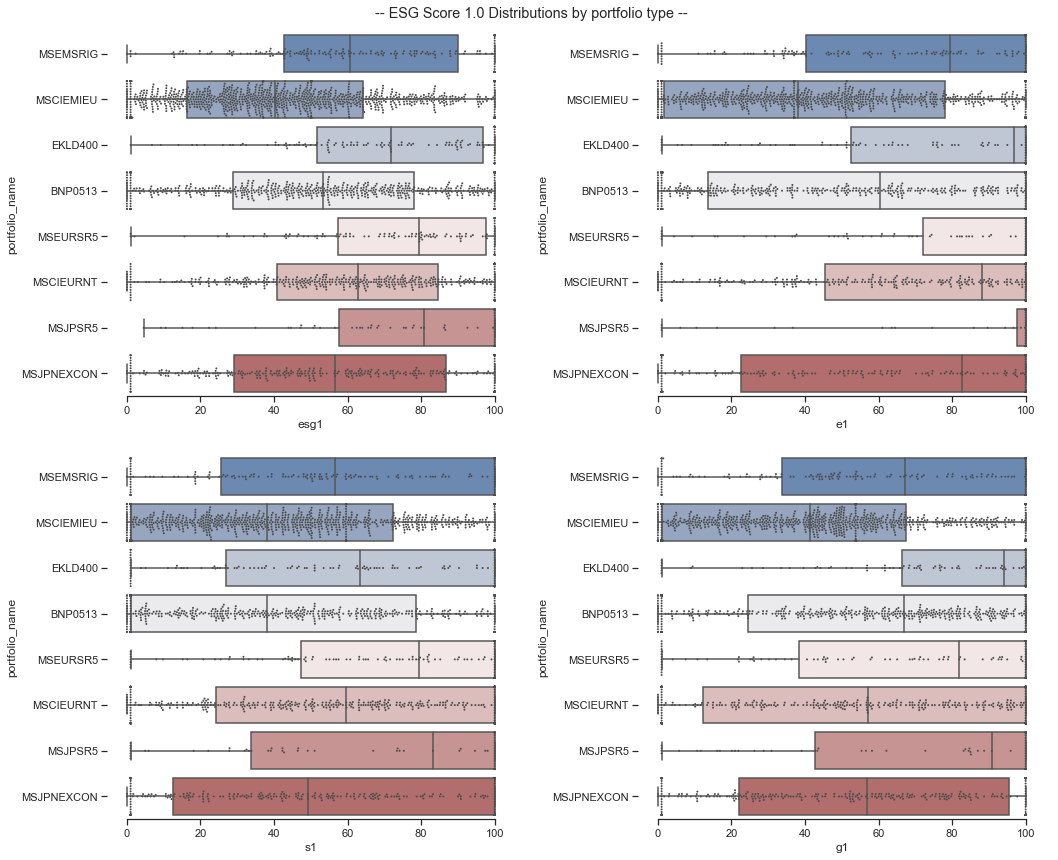

In [127]:
## Plotting New Distributions
scores1 = ['esg1', 'e1', 's1', 'g1']
print('-- SCORES 1.0 BOXPLOTS BY PORTFOLIO -- ')
print('Distribs are much more scattered - as anticipated - but normality is far from being observed (should be @gics/region level)')
print('Comparing ESG index v non-green benchmarks = clear improvement across all portfolios; 2 central quartiles all moved to the right')
print('Yet: Note that in all ESG portfolios, some poorly rated values remain (cf. MSEMRIG?)')
print('Look at e1 ratings for MSJPSR5 portfolio...\n')
plot_distrib(ddbn, scores1)

In [128]:
### BEFORE PROCEEDING WITH DECILES -- CHECK FOR ESG0 DECILE REPARTITION
a = ddbn.decile0.isnull() == False
b = ddbn.esg0.isnull() == True
c = ddbn.exclusion != 'OUT'
d = ddbn.decile0 > 5 
print('-- DECILE ASSESSMENT --')
print('Decile0 has', ddbn[a&b].cusip.count(), 'distinct entries where no ESG global rating but Decile0 exists')
print('Nb of distinct issuers concerned removing BNPP outs: ', ddbn[a&b&c].issuer_id.count())
print('Values excluded:', ', '.join(ddbn[a&b&~c].security_description.tolist()), ' -- Accounting for ', ddbn[a&b&~c]['market_value_%'].sum(), '% of portfolio', ddbn[a&b&~c].portfolio_name.unique())
print('Nb of remaining values with decile < 5:', ddbn[a&b&~c&d]['cusip'].count())
print('\n-- Extract --')
ddbn[a&b&c].sort_values(by = 'decile0')

-- DECILE ASSESSMENT --
Decile0 has 18 distinct entries where no ESG global rating but Decile0 exists
Nb of distinct issuers concerned removing BNPP outs:  15
Values excluded: CHINA NORTHERN RARE EARTH (GROUP), CHINA YANGTZE POWER LTD A, KOREA ELECTRIC POWER CORP  -- Accounting for  0.0015076466347448186 % of portfolio ['MSCIEMIEU']
Nb of remaining values with decile < 5: 3

-- Extract --


,portfolio_name,security_description,mkt_cap,cusip,market_value_%,esg0,decile0,e0,s0,g0,...,e1,s1,g1,esgq1,eq1,sq1,gq1,exclusion,exclusion_reason,parent_name
463,BNP0513,WEYERHAEUSER REIT,> 10B,962166104,0.000798,NaN,1.0,NaN,NaN,NaN,...,97.577395,14.331620,51.889752,54.599589,97.577395,14.331620,51.889752,NaN,NaN,NaN
35,MSJPSR5,SHOWA DENKO,> 10B,S68054691,0.004485,NaN,1.0,NaN,NaN,NaN,...,74.588112,27.908574,39.092665,47.196451,74.588112,27.908574,39.092665,NaN,NaN,NaN
289,MSJPNEXCON,SHOWA DENKO,> 10B,S68054691,0.001045,NaN,1.0,NaN,NaN,NaN,...,74.588112,27.908574,39.092665,47.196451,74.588112,27.908574,39.092665,NaN,NaN,NaN
103,MSJPNEXCON,ADVANTEST CORP,> 10B,S68704907,0.002817,NaN,2.0,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN
370,BNP0513,FORTIVE CORP,> 10B,34959J108,0.000809,NaN,6.0,NaN,NaN,NaN,...,36.507931,46.655217,96.785654,59.982934,36.507931,46.655217,96.785654,NaN,NaN,NaN
177,MSCIEMIEU,SHENZHEN INVESTMENT LTD,> 10B,S65352619,0.000214,NaN,8.0,30.852,57.84,52.187,...,6.346467,52.901693,37.020274,32.089478,6.346467,52.901693,37.020274,NaN,NaN,NaN
163,BNP0513,PTC INC,4B to 10B,69370C100,0.000270,NaN,8.0,NaN,NaN,NaN,...,68.662095,24.245617,1.000000,31.302571,68.662095,24.245617,1.000000,NaN,NaN,NaN
340,MSCIEURNT,FLUTTER ENTERTAINMENT PLC,4B to 10B,BRSTDQW83,0.000860,NaN,8.0,NaN,NaN,NaN,...,1.000000,1.000000,37.185108,13.061703,1.000000,1.000000,37.185108,NaN,NaN,NaN
353,BNP0513,BOOKING HOLDINGS INC,> 10B,09857L108,0.003265,NaN,9.0,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
38,MSJPSR5,ORIENTAL LAND LTD,> 10B,S66488917,0.038161,NaN,9.0,NaN,NaN,NaN,...,89.663442,38.435850,5.755996,44.618429,89.663442,38.435850,5.755996,NaN,NaN,NaN


In [398]:
a = ddbn.portfolio_name == 'MSCIEMIEU'
b = ddbn.decile0.isnull() == True
ddbn[a&b]

,portfolio_name,security_description,mkt_cap,cusip,market_value_%,esg0,decile0,e0,s0,g0,...,exclusion,exclusion_reason,parent_name,decile1,wscore0,wscore1,indic_change,extreme_change,wdec0,wdec1
0,MSCIEMIEU,EMAAR DEVELOPMENT,> 10B,SBDG19775,0.000162,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,0.009012,N,N,NaN,0.000810
9,MSCIEMIEU,TRANSPORTADORA DE GAS DEL SUR ADR,< 4B,893870204,0.000114,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,0.005549,N,N,NaN,0.000568
10,MSCIEMIEU,PAMPA ENERGIA ADR REPSG SA,< 4B,697660207,0.000177,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,0.012182,N,N,NaN,0.000531
11,MSCIEMIEU,GLOBANT SA,< 4B,SBP40HF40,0.000603,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.0,NaN,0.023689,N,N,NaN,0.004223
12,MSCIEMIEU,BANCO MACRO ADR REPRESENTING TEN S,< 4B,05961W105,0.000213,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.0,NaN,0.007003,N,N,NaN,0.001491
14,MSCIEMIEU,GRUPO FINANCIERO GALICIA ADR REPTG,< 4B,399909100,0.000240,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,NaN,0.007241,N,N,NaN,0.001922
15,MSCIEMIEU,TELECOM ARGENTINA ADR REPRESENTING,< 4B,879273209,0.000162,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,0.008190,N,N,NaN,0.000812
16,MSCIEMIEU,BBVA BANCO FRANCES ADR REPTG SA,< 4B,07329M100,0.000053,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,0.002573,N,N,NaN,0.000317
18,MSCIEMIEU,IRB BRASIL RESSEGUROS SA,> 10B,SBYZ6D560,0.001190,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,0.061636,N,N,NaN,0.005951
31,MSCIEMIEU,BCO BTG PACTUAL UNT SA,> 10B,SBZBZVC70,0.000564,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,0.000620,N,N,NaN,0.005637


-- COMPARING DECILE DISTRIBUTIONS -- 
High number of values in the first decile for version 1.0: 558 out of 2574 total securities across the 8 portfolios
% increase in nb of values against old decile: +47.62 %
Correspond to a ~ 8% increase in nb of values in D1
Weighted % increase across 8 portfolios: +30.57% -- Means that new d1 values = better rated, but underweighted.
Looking at kde at portfolio levels: most portfolio show consistent evolution (peaks at 1st deciles ) - Except MSEMRIG
Note: BNP0513 = MSCI USA Hedged.



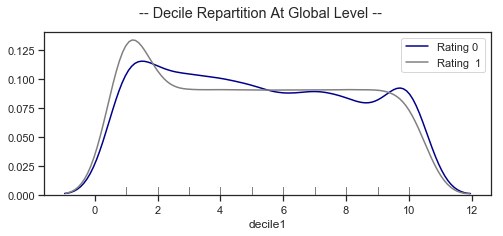

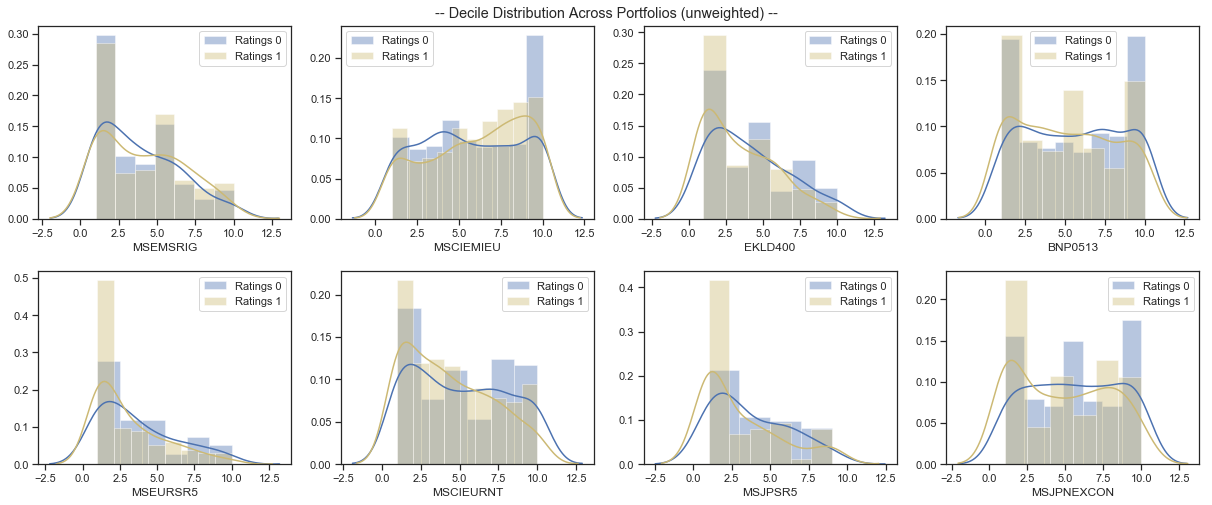

In [293]:
## COMPARING DECILE DISTRIBUTIONS (BEFORE/AFTER)
ddbn['decile1'] = pd.qcut(ddbn.esg1, 11, labels = False, duplicates = 'drop')
ddbn['decile1'] = ddbn['decile1'].apply(lambda x: 10-x)
ddbn[['security_description', 'esg1', 'decile1']].head(10)
oldg= ddbn.decile0 == 1
newg= ddbn.decile1 == 1 
pct_inc = ((ddbn[newg]['market_value_%'].sum() - ddbn[oldg]['market_value_%'].sum())/ddbn[oldg]['market_value_%'].sum())*100

#Plotting decile distrib - across all portfolios 
print('-- COMPARING DECILE DISTRIBUTIONS -- ')
print('High number of values in the first decile for version 1.0:', ddbn[ddbn.decile1 == 1].cusip.count(), 'out of', ddbn.cusip.nunique(), 'total securities across the 8 portfolios')
print('% increase in nb of values against old decile: +{:.02f} %'.format(((len(ddbn[newg])-(len(ddbn[oldg])))/len(ddbn[oldg])*100))) #% means that 5% of values that were not in D1 in V0 entered D1 in V2
print('Correspond to a ~ 8% increase in nb of values in D1')
print('Weighted % increase across 8 portfolios: +{:.02f}% -- Means that new d1 values = better rated, but underweighted.'.format(pct_inc))
print('Looking at kde at portfolio levels: most portfolio show consistent evolution (peaks at 1st deciles ) - Except MSEMRIG')
print('Note: BNP0513 = MSCI USA Hedged.\n')

fig = plt.figure(figsize = (8,3))
sns.distplot(ddbn[ddbn.decile0.isnull() == False].decile0,  label = 'Rating 0', color = 'darkblue', rug=True, hist=False)
sns.distplot(ddbn[ddbn.decile1.isnull() == False].decile1, label = 'Rating  1', color = 'grey', rug=True, hist= False)
plt.suptitle(' -- Decile Repartition At Global Level -- ', y=1)
plt.legend()
plt.show()

plt.close()
i=1
ports = list(ddbn.portfolio_name.unique())
fig = plt.figure(figsize = (17,7))
for _ in ports: 
    fig.add_subplot(2,4,i)
    a = ddbn.portfolio_name == _
    b = ddbn.decile0.isnull() == False
    c  = ddbn.decile1.isnull() == False
    sns.distplot(ddbn[a&b].decile0, label = 'Ratings 0', axlabel = _, color = 'b')
    sns.distplot(ddbn[a&c].decile1, label = 'Ratings 1', axlabel= _, color = 'y')
    plt.legend()
    i +=1

plt.tight_layout()
plt.suptitle('-- Decile Distribution Across Portfolios (unweighted) --', y =1)
plt.show()
plt.close()





 -- DECILE CHANGES -- 
Nb of assets with change in decile (+/- 2): 1371 out of 3071
Weighted pct change: 44.48 %


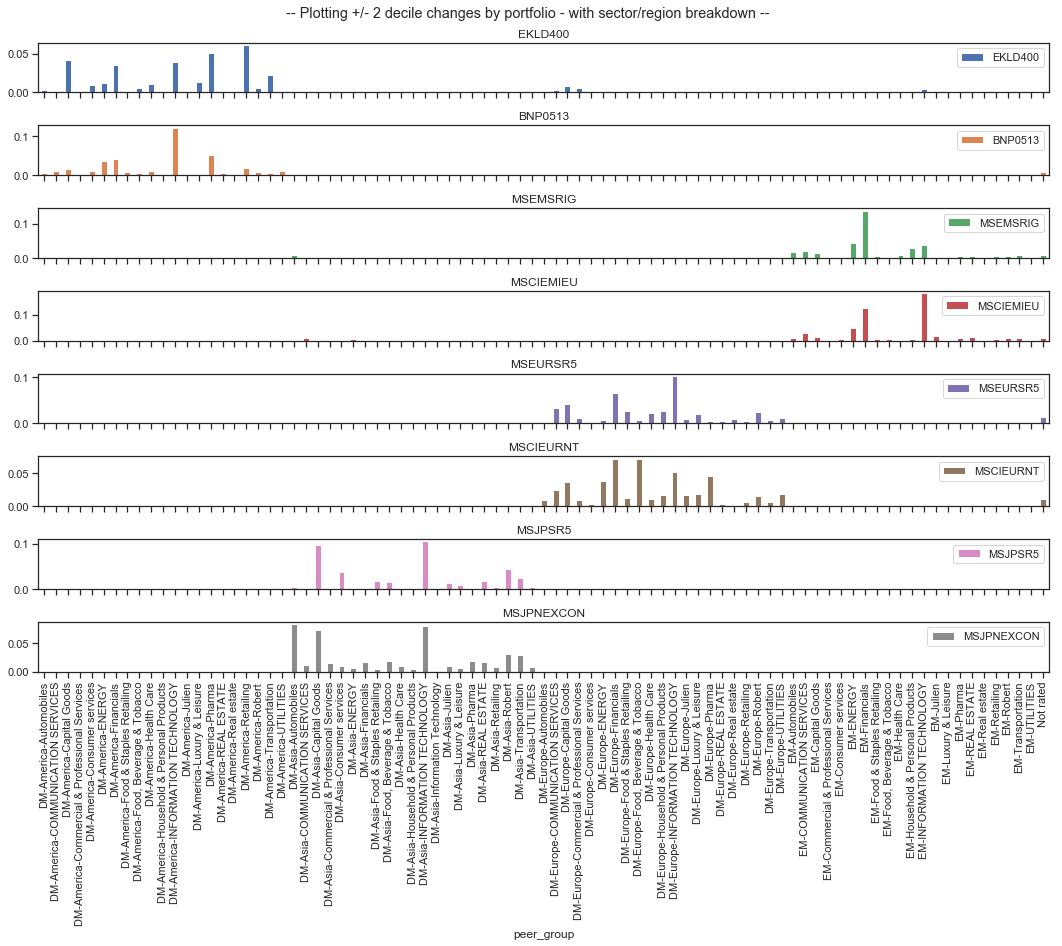

 -- WORST DECILES ENTRIES -- 
Nb of entries in 3 worst deciles: 75 -- representing a change in the weight of the 3 worst deciless of 0.03%
Hence: not many entries & really low weight. Major changes happened elsewhere.
Nb of entries in 3 worst deciles in 4x ESG portfolios: 26 -- Representing a cumulative weight of 4.94 %
Breakdown by portfolio: 

                market_value_%  summed_mkt_val_pct
portfolio_name                                    
EKLD400               0.027525            2.752529
MSEMSRIG              0.084590            8.458958
MSEURSR5              0.016285            1.628500
MSJPSR5               0.065293            6.529256

 -- Extract -- 


,portfolio_name,security_description,cusip,market_value_%,peer_group,decile0,decile1,esg0,esg1
10,MSJPSR5,NINTENDO LTD,S66395500,0.043513,DM-Asia-INFORMATION TECHNOLOGY,6.0,8.0,39.000,22.330611
126,MSEMSRIG,BANCO BRADESCO PREF SA,SB00FM531,0.027496,EM-Financials,7.0,9.0,52.128,12.826604
44,EKLD400,AMGEN INC,031162100,0.025904,DM-America-Pharma,2.0,8.0,51.625,21.145548
153,MSEMSRIG,HINDUSTAN UNILEVER LTD,S62616743,0.015940,EM-Household & Personal Products,5.0,9.0,67.360,12.686699
52,MSJPSR5,TOKYU CORP,S68965482,0.011828,DM-Asia-Transportation,4.0,8.0,50.210,24.174758
1,MSEMSRIG,ASTRA INTERNATIONAL,SB800MQ51,0.008018,EM-Automobiles,7.0,10.0,53.199,1.000000
39,MSJPSR5,KEIO CORP,S64873623,0.008017,DM-Asia-Transportation,7.0,9.0,46.660,17.852811
127,MSEMSRIG,BANCO BRADESCO SA,SB00FM861,0.007740,EM-Financials,7.0,9.0,52.128,12.826604
113,MSEURSR5,BEIERSDORF AG,S51074011,0.005417,DM-Europe-Household & Personal Products,4.0,10.0,76.470,1.000000
21,MSEURSR5,HEIDELBERGCEMENT AG,S51206795,0.005005,DM-Europe-Julien,2.0,8.0,69.590,27.791045


In [399]:
## DECILE CHANGES 
# On crée une variable indicatrice - fonction = custom 
def is_change(col1, col2, threshold): 
    if abs(col1-col2) >= threshold: 
        return 'Y'
    else: 
        return 'N'

esg = ['MSJPSR5', 'MSEMSRIG', 'EKLD400', 'MSEURSR5']
ddbn['indic_change'] = ddbn.apply(lambda row: is_change(row.decile0, row.decile1, 2), axis=1) 
ddbn['extreme_change'] = ddbn.apply(lambda row: is_change(row.decile0, row.decile1,5), axis =1)
gpd_dec = ddbn[ddbn.indic_change == 'Y'].groupby(['portfolio_name', 'peer_group']).agg({'cusip': 'count', 
                                                                            'market_value_%': 'sum',
                                                                            'decile0': 'mean',
                                                                            'esg0': 'mean', 
                                                                            'decile1': 'mean', 
                                                                            'esg1': 'mean', 
                                                                            'esgq1': 'mean'})
e = ddbn.indic_change == 'Y'
f = ddbn.decile1.isin(range(8, 11))
g = ddbn.decile0.isin(range(8, 11))
h = ddbn.portfolio_name.isin(esg)

print('\n -- DECILE CHANGES -- ')
print('Nb of assets with change in decile (+/- 2):', len(ddbn[e]), 'out of', len(ddbn))
print('Weighted pct change: {:.02f} %'.format(100*ddbn[ddbn.indic_change == 'Y']['market_value_%'].sum()/ddbn['market_value_%'].sum()))


plt.close()
gpd_dec['market_value_%'].unstack(level=0)[['EKLD400', 'BNP0513', 'MSEMSRIG', 'MSCIEMIEU', 'MSEURSR5', 'MSCIEURNT', 'MSJPSR5', 'MSJPNEXCON']].plot(kind='bar', subplots=True, figsize = (15,13))
plt.suptitle('-- Plotting +/- 2 decile changes by portfolio - with sector/region breakdown --', y=1.01)
plt.tight_layout()
plt.show()

print(' -- WORST DECILES ENTRIES -- ')
print('Nb of entries in 3 worst deciles:', len(ddbn[f]) - len(ddbn[g]), '-- representing a change in the weight of the 3 worst deciless of {:.02f}%'.format(100*(ddbn[f]['market_value_%'].sum()\
                                                                                                                                   - ddbn[g]['market_value_%'].sum())/ddbn[g]['market_value_%'].sum()))
print('Hence: not many entries & really low weight. Major changes happened elsewhere.')
print('Nb of entries in 3 worst deciles in 4x ESG portfolios: {} -- Representing a cumulative weight of {:.02f} %'.format(len(ddbn[h & f & ~g & e]),100*ddbn[h & f & ~g & e]['market_value_%'].sum()/ddbn[h]['market_value_%'].sum()))
print('Breakdown by portfolio: \n')

gpd_port = ddbn[h & f & ~g & e].groupby('portfolio_name').agg({'market_value_%': 'sum'})
gpd_port['summed_mkt_val_pct'] = gpd_port['market_value_%']*100
print(gpd_port)

print('\n -- Extract -- ')
ddbn[h & f & ~g & e][['portfolio_name', 'security_description', 'cusip', 'market_value_%', 'peer_group', 'decile0', 'decile1', 'esg0', 'esg1']].sort_values(by = 'market_value_%', ascending = False)


In [371]:
## GETTING PORTFOLIO SCORES 
ddbn['wscore0'] = ddbn['market_value_%']*ddbn.esg0 
ddbn['wscore1'] = ddbn['market_value_%']*ddbn.esg1
pscore = ddbn.groupby('portfolio_name').agg({'wscore0':'sum', 'wscore1': 'sum'})
pscore['pct_change'] = ((pscore.wscore1 - pscore.wscore0)/pscore.wscore0)*100
µ = pscore['pct_change'].loc[['MSJPSR5', 'MSEMSRIG', 'EKLD400', 'MSEURSR5']].reset_index()['pct_change'].mean()

print(' -- PORTFOLIO SCORES -- ')
print('With a 20% target increase for all SRI indexes (MSJPSR5, MSEMSRIG, EKLD400, MSEURSR5)')
print('Avg increase across SRI ports: +{:.02f} % (!!)'.format(µ)) 
print('Bias: result unweighted by portfolio nav - shouldn\'n be put on an equal footing')
print('Against Portfolio 1.1 Test Excel File: significant diff in KLD SRI\n')
pscore.sort_values(by='wscore1', ascending = False)

### Recalc avec le décile (pcq ancien score pas comparable)
ddbn['wdec0'] = ddbn.decile0*ddbn['market_value_%'] 
ddbn['wdec1'] = ddbn.decile1*ddbn['market_value_%']


final_ch = {'MSJPSR5': (bfaf.loc['MSJPSR5', 'wdec1'] - bfaf.loc['MSJPNEXCON', 'wdec1'])/(bfaf.loc['MSJPNEXCON', 'wdec1']), 
           'MSEMSRIG': (bfaf.loc['MSEMSRIG', 'wdec1'] - bfaf.loc['MSCIEMIEU', 'wdec1'])/(bfaf.loc['MSCIEMIEU', 'wdec1']), 
           'EKLD400': (bfaf.loc['EKLD400', 'wdec1'] - bfaf.loc['BNP0513', 'wdec1'])/(bfaf.loc['BNP0513', 'wdec1']),
           'MSEURSR5': (bfaf.loc['MSEURSR5', 'wdec1'] - bfaf.loc['MSCIEURNT', 'wdec1'])/(bfaf.loc['MSCIEURNT', 'wdec1'])}

bfaf = ddbn.groupby('portfolio_name').agg({'wdec0':'sum', 'wdec1': 'sum'})
bfaf['pct_change'] = 100*(bfaf['wdec1'] - bfaf['wdec0'])/bfaf['wdec0']
for key, value in final_ch.items(): 
    print(key, value)
    
bfaf.sort_values(by='pct_change', ascending = True)


 -- PORTFOLIO SCORES -- 
With a 20% target increase for all SRI indexes (MSJPSR5, MSEMSRIG, EKLD400, MSEURSR5)
Avg increase across SRI ports: +22.86 % (!!)
Bias: result unweighted by portfolio nav - shouldn'n be put on an equal footing
Against Portfolio 1.1 Test Excel File: significant diff in KLD SRI

MSJPSR5 -0.36203576147986966
MSEMSRIG -0.4034410028547511
EKLD400 -0.2902113106365913
MSEURSR5 -0.279009772145327


,wdec0,wdec1,pct_change
portfolio_name,,,
MSJPSR5,3.192749,2.625984,-17.751647
MSCIEURNT,4.407378,3.676858,-16.574943
MSJPNEXCON,4.704843,4.116193,-12.511573
MSEURSR5,2.932918,2.650978,-9.612940
EKLD400,3.445903,3.118731,-9.494542
BNP0513,4.707062,4.393886,-6.653325
MSEMSRIG,3.014943,3.569533,18.394737
MSCIEMIEU,4.954138,5.983538,20.778602


In [358]:
final_ch

,pct_change


In [353]:
### MISCELLANEOUS 
x = ddbn.exclusion == 'OUT'
y = ddbn.portfolio_name == 'MSEMSRIG'

print('-- MISCELLANEOUS --')
print('Checking values that should be excluded according to BNPP Policies (\'OUT\')')
print('Total values found across all portfolios:', len(ddbn[ddbn.exclusion == 'OUT']))
print('1 of these values is currently part of a SRI portfolio:', ddbn[x&y].security_description.tolist()[0], '(', ddbn[x&y].cusip.tolist()[0],')', 'accounting for', ddbn[x&y]['market_value_%'].tolist()[0], '% of the portfolio')
print('\n -- OUTS BREAKDOWN -- ')
ddbn[ddbn.exclusion == 'OUT'].groupby(['portfolio_name', 'peer_group']).agg({'cusip': 'count', 
                                                                             'market_value_%': 'sum',
                                                                             'decile0': 'mean',
                                                                             'esg0': 'mean', 
                                                                            'decile1': 'mean', 
                                                                            'esg1': 'mean', 
                                                                            'esgq1': 'mean'})

-- MISCELLANEOUS --
Checking values that should be excluded according to BNPP Policies ('OUT')
Total values found across all portfolios: 62
1 of these values is currently part of a SRI portfolio: INTER RAO EES ( SB5B2VL79 ) accounting for 0.002129754197806702 % of the portfolio

 -- OUTS BREAKDOWN -- 


cusip  \
portfolio_name peer_group                                            
BNP0513        DM-America-Capital Goods                          3   
               DM-America-ENERGY                                 1   
               DM-America-Food, Beverage & Tobacco               2   
               DM-America-Julien                                 1   
               DM-America-UTILITIES                             11   
MSCIEMIEU      DM-America-Julien                                 1   
               DM-Asia-INFORMATION TECHNOLOGY                    1   
               DM-Asia-UTILITIES                                 1   
               EM-Capital Goods                                  1   
               EM-Consumer services                              1   
               EM-ENERGY                                         1   
               EM-Food, Beverage & Tobacco                       9   
               EM-INFORMATION TECHNOLOGY                         1   
               EM-Julien                                        10   
               EM-Transportation                                 1   
               EM-UTILITIES                                      6   
MSCIEURNT      DM-Europe-Commercial & Professional Services      1   
               DM-Europe-Food, Beverage & Tobacco                2   
               DM-Europe-Julien                                  3   
               DM-Europe-UTILITIES                               2   
MSEMSRIG       EM-UTILITIES                                      1   
MSJPNEXCON     DM-Asia-Food, Beverage & Tobacco                  1   
               DM-Asia-UTILITIES                                 1   

                                                             market_value_%  \
portfolio_name peer_group                                                     
BNP0513        DM-America-Capital Goods                            0.006805   
               DM-America-ENERGY                                   0.000313   
               DM-America-Food, Beverage & Tobacco                 0.007926   
               DM-America-Julien                                   0.000531   
               DM-America-UTILITIES                                0.008048   
MSCIEMIEU      DM-America-Julien                                   0.000539   
               DM-Asia-INFORMATION TECHNOLOGY                      0.000311   
               DM-Asia-UTILITIES                                   0.001130   
               EM-Capital Goods                                    0.000159   
               EM-Consumer services                                0.000522   
               EM-ENERGY                                           0.000647   
               EM-Food, Beverage & Tobacco                         0.007216   
               EM-INFORMATION TECHNOLOGY                           0.000029   
               EM-Julien                                           0.003135   
               EM-Transportation                                   0.000668   
               EM-UTILITIES                                        0.004578   
MSCIEURNT      DM-Europe-Commercial & Professional Services        0.000469   
               DM-Europe-Food, Beverage & Tobacco                  0.003437   
               DM-Europe-Julien                                    0.009455   
               DM-Europe-UTILITIES                                 0.002580   
MSEMSRIG       EM-UTILITIES                                        0.002130   
MSJPNEXCON     DM-Asia-Food, Beverage & Tobacco                    0.007697   
               DM-Asia-UTILITIES                                   0.002187   

                                                             decile0  \
portfolio_name peer_group                                              
BNP0513        DM-America-Capital Goods                         10.0   
               DM-America-ENERGY                                10.0   
               DM-America-Food, Beverage & Tob

In [282]:
### OUTS WE SHOULDN'T HAVE

,portfolio_name,security_description,mkt_cap,cusip,market_value_%,esg0,decile0,e0,s0,g0,...,eq1,sq1,gq1,exclusion,exclusion_reason,parent_name,decile1,wscore0,wscore1,indic_change
187,MSEMSRIG,INTER RAO EES,> 10B,SB5B2VL79,0.002130,NaN,NaN,NaN,NaN,NaN,...,100.0,82.392693,82.980375,OUT,Coal Policy,NaN,10.0,NaN,0.0,N
978,MSCIEMIEU,INTER RAO EES,> 10B,SB5B2VL79,0.000466,NaN,NaN,NaN,NaN,NaN,...,100.0,82.392693,82.980375,OUT,Coal Policy,NaN,10.0,NaN,0.0,N


In [395]:
print('-- EXTREME CHANGES -- ')
print('Out values don\'t have ratings and have then been logically excluded.')
excl = ddbn[ddbn.extreme_change == 'Y'][['portfolio_name','cusip', 'security_description','esg0', 'decile0', 'esg1', 'decile1', 'exclusion', 'exclusion_reason']]
excl_no_out = excl[excl.exclusion != 'OUT']
print('Total values concerned: ', len(excl_no_out))
excl_no_out.groupby('portfolio_name').count()
#excl_no_out.to_excel('excl_no_out.xlsx')

-- EXTREME CHANGES -- 
Out values don't have ratings and have then been logically excluded.
Total values concerned:  278


,cusip,security_description,esg0,decile0,esg1,decile1,exclusion,exclusion_reason
portfolio_name,,,,,,,,
BNP0513,49,49,49,49,49,49,0,0
EKLD400,9,9,9,9,9,9,0,0
MSCIEMIEU,104,104,103,104,104,104,0,0
MSCIEURNT,52,52,52,52,52,52,0,0
MSEMSRIG,11,11,11,11,11,11,0,0
MSEURSR5,12,12,12,12,12,12,0,0
MSJPNEXCON,34,34,33,34,34,34,0,0
MSJPSR5,7,7,6,7,7,7,0,0


In [391]:
ddbn[ddbn.cusip == 'SB29TTR10'][['esg0', 'esg1', 'exclusion', 'decile0', 'decile1']]

,esg0,esg1,exclusion,decile0,decile1
24,62.449,45.610974,NaN,1.0,6.0
876,62.449,45.610974,NaN,1.0,6.0


In [424]:
top_10 = {}
for _ in ddbn.portfolio_name.unique():
    top_10['top10_%02s' % _] = ddbn[ddbn.portfolio_name == _].sort_values(by = 'market_value_%', ascending =False).head(10)
    
merged_10 = pd.DataFrame(data = {}, columns = top_10['top10_BNP0513'].columns)
for _ in ddbn.portfolio_name.unique(): 
     merged_10 = pd.concat([merged_10, top_10['top10_%02s' % _]])

merged_10 = merged_10[['portfolio_name', 'security_description', 'cusip', 'mkt_cap', 'market_value_%', 'esg0', 'decile0', 'esg1',\
                       'decile1', 'exclusion', 'indic_change', 'extreme_change', 'peer_group', 'country', 'region', 'gics']]
merged_10.to_excel('Top10_AcrossPortfolios.xlsx')
merged_10[merged_10.indic_change == 'Y'].to_excel('Top10_AcrossPortfolios_ChangeDec.xlsx')
merged_10[merged_10.extreme_change == 'Y'].to_excel('Top10_AcrossPortfolios_ExtremeChg.xlsx')

,portfolio_name,security_description,mkt_cap,cusip,market_value_%,esg0,decile0,e0,s0,g0,...,exclusion,exclusion_reason,parent_name,decile1,wscore0,wscore1,indic_change,extreme_change,wdec0,wdec1
48,BNP0513,WESTLAKE CHEMICAL CORP,4B to 10B,960413102,0.000088,44.000,10.0,27.000,45.000,63.000,...,NaN,NaN,NaN,10.0,0.003885,0.000088,N,N,0.000883,0.000883
560,BNP0513,CONTINENTAL RESOURCES INC,> 10B,212015101,0.000098,43.555,9.0,32.286,40.371,60.417,...,NaN,NaN,NaN,8.0,0.004289,0.002499,N,N,0.000886,0.000788
40,BNP0513,FLUOR CORP,< 4B,343412102,0.000102,53.560,1.0,41.000,50.000,69.000,...,NaN,NaN,NaN,6.0,0.005456,0.004721,Y,Y,0.000102,0.000611
154,BNP0513,ALKERMES,< 4B,SB3P6D269,0.000108,36.640,7.0,15.000,29.640,50.800,...,NaN,NaN,NaN,8.0,0.003947,0.002096,N,N,0.000754,0.000862
173,BNP0513,NEKTAR THERAPEUTICS,< 4B,640268108,0.000115,33.000,9.0,15.000,28.000,45.000,...,NaN,NaN,NaN,7.0,0.003804,0.003963,Y,N,0.001037,0.000807
356,BNP0513,MACERICH REIT,< 4B,554382101,0.000119,59.695,2.0,63.192,47.025,62.313,...,NaN,NaN,NaN,1.0,0.007109,0.011909,N,N,0.000238,0.000119
485,BNP0513,COTY INC CLASS A,4B to 10B,222070203,0.000129,56.700,9.0,42.833,62.438,62.917,...,NaN,NaN,NaN,8.0,0.007297,0.003188,N,N,0.001158,0.001029
76,BNP0513,PLAINS GP HOLDINGS CLASS A,4B to 10B,72651A207,0.000130,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,NaN,0.001111,N,N,NaN,0.001167
405,BNP0513,AMERCO,4B to 10B,023586100,0.000132,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,0.000132,N,N,NaN,0.001316
554,BNP0513,UNDER ARMOUR INC CLASS C,4B to 10B,904311206,0.000132,53.065,9.0,43.000,56.278,54.686,...,NaN,NaN,NaN,7.0,0.006986,0.005169,Y,N,0.001185,0.000922


In [416]:
ddbn.columns

Index(['portfolio_name', 'security_description', 'mkt_cap', 'cusip',
       'market_value_%', 'esg0', 'decile0', 'e0', 's0', 'g0', 'issuer_id',
       'issuer_name', 'parent_issuer_id', 'parent_issuer_name', 'country',
       'gics', 'region', 'gs_mean', 'gs_std', 'sc_issuer', 'issuername',
       'peer_group', 'esg1', 'e1', 's1', 'g1', 'esgq1', 'eq1', 'sq1', 'gq1',
       'exclusion', 'exclusion_reason', 'parent_name', 'decile1', 'wscore0',
       'wscore1', 'indic_change', 'extreme_change', 'wdec0', 'wdec1'],
      dtype='object')

In [180]:
%whos

Variable                             Type         Data/Info
-----------------------------------------------------------
a                                    Series       0      False\n1      Fals<...>Length: 3071, dtype: bool
axs                                  ndarray      2x4: 8 elems, type `object`, 32 bytes
b                                    Series       0       True\n1       Tru<...>Length: 3071, dtype: bool
c                                    Series       0      True\n1      True\<...>Length: 3071, dtype: bool
c1                                   DataFrame         portfolio_name      <...>e  49.083698  11.249558  
c2                                   DataFrame         portfolio_name      <...>a  52.660043   9.445633  
c3                                   DataFrame         portfolio_name      <...>a  52.660043   9.445633  
cc                                   DataFrame         portfolio_name      <...>\n[166 rows x 19 columns]
d                                    Series       